<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Linear-Discriminant-Analysis" data-toc-modified-id="Linear-Discriminant-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><a href="https://en.wikipedia.org/wiki/Linear_discriminant_analysis" rel="nofollow" target="_blank">Linear Discriminant Analysis</a></a></span><ul class="toc-item"><li><span><a href="#Theory-and-Model" data-toc-modified-id="Theory-and-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Theory and Model</a></span><ul class="toc-item"><li><span><a href="#Head-the-Problem" data-toc-modified-id="Head-the-Problem-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Head the Problem</a></span></li><li><span><a href="#Transform-the-Problem" data-toc-modified-id="Transform-the-Problem-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Transform the Problem</a></span></li><li><span><a href="#Solve-the-Problem" data-toc-modified-id="Solve-the-Problem-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Solve the Problem</a></span></li></ul></li><li><span><a href="#MultiClasses-Problem" data-toc-modified-id="MultiClasses-Problem-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>MultiClasses Problem</a></span><ul class="toc-item"><li><span><a href="#Derivation" data-toc-modified-id="Derivation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Derivation</a></span></li></ul></li><li><span><a href="#Summary-for-LDA" data-toc-modified-id="Summary-for-LDA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary for LDA</a></span></li></ul></li><li><span><a href="#Code-Implementation" data-toc-modified-id="Code-Implementation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Code Implementation</a></span></li><li><span><a href="#LDA-With-scikit-learn" data-toc-modified-id="LDA-With-scikit-learn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LDA With scikit-learn</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tune-LDA-Hyperparameters" data-toc-modified-id="Tune-LDA-Hyperparameters-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Tune LDA Hyperparameters</a></span></li></ul></li></ul></li><li><span><a href="#LAB-Assignment" data-toc-modified-id="LAB-Assignment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LAB Assignment</a></span><ul class="toc-item"><li><span><a href="#Exercise-1-Linear-Discriminant-Analysis-from-Scratch-using-numpy-(50-points-)" data-toc-modified-id="Exercise-1-Linear-Discriminant-Analysis-from-Scratch-using-numpy-(50-points-)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )</a></span></li><li><span><a href="#Exercise-2-Recognize-handwritten-numbers-with-LDA-(50-points-)." data-toc-modified-id="Exercise-2-Recognize-handwritten-numbers-with-LDA-(50-points-).-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exercise 2 Recognize handwritten numbers with LDA (50 points ).</a></span></li><li><span><a href="#MNIST-Dataset" data-toc-modified-id="MNIST-Dataset-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>MNIST Dataset</a></span><ul class="toc-item"><li><span><a href="#MNIST-Dataset-File-Formats" data-toc-modified-id="MNIST-Dataset-File-Formats-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>MNIST Dataset File Formats</a></span></li></ul></li></ul></li><li><span><a href="#THE-IDX-FILE-FORMAT" data-toc-modified-id="THE-IDX-FILE-FORMAT-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>THE IDX FILE FORMAT</a></span></li></ul></div>

# LAB6 tutorial for Machine Learning <br >Linear Discriminant Analysis(LDA)
> The document description are designed by JIa Yanhong in 2022. Oct. 3th
------

## Objective

- Learn LDA’s theoretical concepts.  
- Implement LDA from scratch using NumPy.
- How to fit, evaluate, and make predictions with the Linear Discriminant Analysis model with Scikit-Learn.
- How to tune the hyperparameters of the Linear Discriminant Analysis algorithm on a given dataset.
- Complete the LAB assignment.

------

## [Linear Discriminant Analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)

Linear Discriminant Analysis(LDA) is a supervised learning algorithm used as a classifier and a dimensionality reduction algorithm. The basic idea of LDA is to project data into a low-dimensional space, so that **the same class of data is as close as possible, while different classes of data are as far away as possible**. 

![](images/example.png)

The left plot shows samples from two classes (depicted in red and blue) along with the histograms resulting from projection onto the line joining the class means. Note
that there is considerable class overlap in the projected space. 

The right plot shows the corresponding projection based on the Fisher linear discriminant, showing the
greatly improved class separation.

So our job is seeking to obtain a scalar  $y$ by projecting the samples $X$ onto a line:
$$
y = \theta^{T}X
$$ 

Then try to find the $\theta^\ast$ to maximize the ratio of `between-class variance` to `within-class variance`. Next, we will introduce how to use mathematic way to present this problem. 

### Theory and Model
To figure out the LDA, first we need know how to translate `between-class variance` and `within-class variance` to mathematic language. Then we try to maximize the ratio between these two. To simplify the problem, we start with two classes problem.

#### Head the Problem
Assume we have a set of D-dimensional samples $X = \{x^{(1)}, x^{(2)}, ... x^{(m)} \}$, $N_1$ of which belong to class $C_1$, and $N_2$ of which belong to class $C_2$.
We also assume the mean vector of two classes in X-space:
$$
	u_k = \frac{1}{N_k} \sum_{i \in C_k} x ^{(i)} \quad \textrm{where}  \quad k = 1, 2.
$$
and in y-space:
$$
	{\hat{u}}_k = \frac{1}{N_k} \sum_{i \in C_k} y^{(i)} = \frac{1}{N_k} \sum_{i \in C_k} \theta^{T}x^{(i)} = \theta^{T}u_k \quad \textrm{where} \quad k = 1, 2.
$$

One way to define a measure of separation between two classes is to choose the distance between the projected means, which is in y-space, so the `between-class variance` is:
$$
	\hat{u}_2 - \hat{u}_1 =  \theta^{T}(u_2 - u_1)
$$
Also, we can define the `within-class variance` for each class $C_k$ is:
$$
	\hat{s}^{2}_k = \sum_{i \in C_k} (y^{(i)}-\hat{u}_k)^2 \quad \textrm{where} \quad k = 1,2.
$$
Then, we get the between-class variance and within-class variance, we can define our objective function $J(\theta)$ as:
$$
	J(\theta) = \frac{(\hat{u}_2 -\hat{u}_1)^2} {\hat{s}^{2}_1 + \hat{s}^{2}_2}
$$
In fact, if maximizing the objective function $J$, we are looking for a projection where examples from the class are projected very close to each other and at the same time, the projected means are as farther apart as possible. 



#### Transform the Problem
To find the optimum $\theta^\ast$, we must express $J(\theta)$ as a function of $\theta$. Before the optimum,we need introduce **scatter** instead of variance. 

We define some measures of the scatter as following:

- The scatter in feature space-x: $  S_k = \sum_{i \in C_k} (x^{(i)} - u_k) (x^{(i)} - u_k)^{T} $ 
- Within-class scatter matrix: $S_W = S_1 + S_2$
- Between-class scather matrix: $S_B = (u_2 - u_1)(u_2 - u_1)^T$

Let's see $J(\theta)$ again:
$$
	J(\theta) = \frac{(\hat{u}_2 -\hat{u}_1)^2} {\hat{s}^{2}_1 + \hat{s}^{2}_2}
$$
The scatter of the projection $y$ can then be expressed as a function of the scatter matrix in feature space $x$:
\begin{align*}
	\hat{s}^{2}_k &= \sum_{i \in C_k} (y^{(i)}-\hat{u}_k)^2 \\
	&= \sum_{i \in C_k}(\theta^{T}x^{(i)} - \theta^{T}u_k )^2  \\
	&= \sum_{i \in C_k} \theta^{T}(x^{(i)} - u_k)(x^{(i)} - u_k)^T\theta \\
	&= \theta^T S_k \theta
\end{align*}
So we can get:
\begin{align*}
	\hat{s}^{2}_1 + \hat{s}^{2}_2 &= \theta^T S_1 \theta + \theta^T S_2 \theta \\
	&= \theta^T S_W \theta
\end{align*}
Similarly, the difference between the projected means can be expressed in terms 
of the means in the original feature space:
\begin{align*}
	(\hat{u}_2 -\hat{u}_1)^2 &= (\theta^T u_2 - \theta^T u_1)^2 \\
	&= \theta^T (u_2 - u_1)(u_2 - u_1)^T \theta \\
	&= \theta^TS_B\theta
\end{align*}
We can finally express the Fisher criterion in terms of $S_W$ and $S_B$ as:
$$
	J(\theta) = \frac{\theta^T S_B \theta} {\theta^T S_W \theta}
$$
Next, we will maximize this objective function. 

#### Solve the Problem
The easiest way to maximize the object function $J$ is to derive it and set it to zero.
\begin{align*}
	\frac {\partial J(\theta)}{\partial \theta} &= \frac {\partial } {\partial \theta} (\frac{\theta^T S_B \theta} {\theta^T S_W \theta}) \\
	&= (\theta^T S_W \theta) \frac{\partial (\theta^T S_B \theta)} {\partial \theta} - (\theta^T S_B \theta) \frac {\partial (\theta^T S_W \theta)} {\partial \theta} = 0 \\
	\implies &= (\theta^T S_W \theta) 2 S_B \theta - (\theta^T S_B \theta) 2 S_W \theta = 0
\end{align*}
Divided by $\theta^T S_W \theta:$ 
\begin{align*}
	&\implies (\frac{\theta^T S_W \theta} {\theta^T S_W \theta})S_B\theta - (\frac{\theta^T S_B \theta} {\theta^T S_W \theta})S_W \theta = 0 \\
	&\implies S_B \theta - J S_W \theta = 0 \\
	&\implies S^{-1}_W S_B \theta - J\theta = 0 \\
	&\implies  J\theta = S^{-1}_W S_B \theta  \\
	&\implies  J\theta = S^{-1}_W (u_2 - u_1)(u_2 - u_1)^T \theta  \\
	&\implies  J\theta = S^{-1}_W (u_2 - u_1) (\underbrace{(u_2 - u_1)^T \theta}_{c \in \mathbb{R}})  \\
	&\implies  J\theta = c S^{-1}_W(u_2 - u_1)   \\
	&\implies \theta = \frac{c}{J} S^{-1}_W(u_2 - u_1)
\end{align*}
For now, the problem has been solved and we just want to get the direction of the $\theta$, which is the optimum $ \theta^\ast$:
$$
	\theta^{\ast}  \propto S^{-1}_W(u_2 - u_1)
$$
This is known as Fisher's linear discriminant(1936), although it is not a discriminant but rather a specific choice of direction for the projection of the data down to one dimension, which is $y = \theta^{\ast T}X$. 


### MultiClasses Problem
Based on two classes problem, we can see that the fisher's LDA generalizes gracefully for multiple classes problem. Assume we still have a set of D-dimensional samples $X = \{x^{(1)}, x^{(2)}, ... , x^{(m)} \}$, and there are totally $C$ classes. Instead of one projection $y$, mentioned above, we now will seek $(C-1)$ projections $[y_1, y_2, \dots y_{C-1}]$ by means of $(C-1)$ projection vectors $\theta_i$ arranged by columns into a projection matrix $\Theta = [\theta_1 | \theta_2 | \dots | \theta_{C-1}]$, where: 
$$
	y_i  = \theta_i^{T}X 
	\implies y = \Theta^T X
$$

#### Derivation
First we will use the scatters in space-x as following:

- Within-class scatter matrix:
$$
S_W = \sum_{i=1}^{C}S_i \quad \text{where} \quad S_i = \sum_{i \in C_i}(x^{(i) }- u_i)(x^{(i)} - u_i)^T \: \text{and} \: u_i = \frac{1}{N_i} \sum_{i \in C_i} x^{(i)}
$$
- Between-class scatter matrix:
$$
S_B = \sum_{i=1}^{C}N_i (u_i - u)(u_i - u)^T \quad \text{where} \quad u = \frac{1}{m}\sum_{i=1}^{m}x^{(i)} = \frac{1}{m}\sum_{i=1}^{C}N_i u_i
$$
- Total scatter matrix:
$$
S_T = S_B + S_W
$$


Before moving on, let us see a picture for the multi-class example:


<center>
    <img src='images/multi-16656247203831.png' style="zoom:100%;"/>
    <br>
    <div style="">
      LDA Multi-Class examples
  	</div>
</center><br>

Similarly, we define the mean vector and scatter matrices for the projected samples as:

- $\hat{u}_i = \frac{1}{N_i} \sum_{i \in C_i} y^{(i)}$ 
- $\hat{u} = \frac{1}{N} \sum_{i=1}^{m}y^{(i)}$
- $ \hat{S}_W = \sum_{i=1}^{C}\sum_{y \in C_i} (y - \hat{u}_i)(y - \hat{u}_i)^T $
- $\hat{S}_B = \sum_{i=1}^{C} N_i (\hat{u}_i - \hat{u})(\hat{u}_i - \hat{u})^T$

From our derivation for the two-class problem, we can get:
\begin{align}
	\hat{S}_W = \Theta^T S_W \Theta \\
	\hat{S}_B =  \Theta^T S_B \Theta
\end{align}
Recall that we are looking for a projection that maximizes the ratio of between-class to within-class scatter. Since the projection is no longer a scalar (it has $C-1$ dimensions), we use the determinant of the scatter matrices to obtain a scalar objective function:
$$
	J(W) = \frac{|\hat{S}_B|}{|\hat{S}_W|} = \frac{|\Theta^T S_B \Theta|}{|\Theta^T S_W \Theta|}
$$
And now, our job is to seek the projection matrix $\Theta^{\ast} $that maximize this ratio. We will not give the derivation process. But we know that the optimal projection matrix $\Theta^{\ast}$ is the one whose columns are the eigenvectors corresponding to the largest eigenvalues of the following generalized eigenvalue problem:
\begin{align*}
	\Theta^{\ast} &= [\theta_{1}^{\ast} | \theta_{2}^{\ast} | \dots | \theta_{C-1}^{\ast}] \\
	&= \text{argmax} \frac{|\Theta^T S_B \Theta|}{|\Theta^T S_W \Theta|}
\end{align*}
$$
	\implies (S_B - \lambda_i S_W)\theta_{i}^{\ast} = 0
$$
Thus, if $S_W$ is a non-singular matrix, and can be inverted, then the Fisher's criterion is maximized when the projection matrix $\Theta^{\ast}$ is composed of the eigenvectors of:
$$
	S^{-1}_WS_B
$$
Noticed that, there will be at most $C-1$ eigenvectors with non-zero real corresponding eigenvalues $\lambda_i$. This is because $S_B$ is of rank $(C-1)$ or less. So we can see that LDA can represent a massive reduction in the dimensionality of the problem. In face recognition for example there may be several thousand variables, but only a few hundred classes. 


### Summary for LDA
In summary, LDA can be performed in 5 steps:

1. Compute the mean $\mu_i$ for each class and the global mean $\mu$ for all samples.
2. Compute  the within-class scatter matrix $S_w$, the global scatter matrix $S_t$, and the between-class scatter matrix $S_b$ .
3. Compute the eigen vectors and corresponding eigen values for $S_w^{-1}S_b$ .
4. Sort the eigenvectors by decreasing eigenvalues and choose $C-1$ eigenvectors with the largest eigenvalues.
5. Form the projection matrix with chosen eigenvectors
6. Use this eigenvector matrix to transform the samples onto the new subspace. $Y = X \times W $
   
 
------  
					

## Code Implementation 
**This is your lab assignment ！！！**


------

## LDA With scikit-learn
The Linear Discriminant Analysis is available in the scikit-learn Python machine learning library via the [LinearDiscriminantAnalysis class](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).

The method can be used directly without configuration, although the implementation does offer arguments for customization, such as the choice of solver and the use of a penalty.


 ```python
# create the lda model
model = LinearDiscriminantAnalysis()
```

We can demonstrate the Linear Discriminant Analysis method with a worked example.

First, let’s define a synthetic classification dataset.

We will use the [make_classification() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to create a dataset with 1,000 examples, each with 10 input variables.

The example creates and summarizes the dataset.

In [3]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


We can fit and evaluate a Linear Discriminant Analysis model using [repeated stratified k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/) via the [RepeatedStratifiedKFold class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html). We will use 10 folds and three repeats in the test harness.

The complete example of evaluating the Linear Discriminant Analysis model for the synthetic binary classification task is listed below.

In [4]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.893 (0.033)


Running the example evaluates the Linear Discriminant Analysis algorithm on the synthetic dataset and reports the average accuracy across the three repeats of 10-fold cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times.

In this case, we can see that the model achieved a mean accuracy of about 89.3 percent.

We may decide to use the Linear Discriminant Analysis as our final model and make predictions on new data.

This can be achieved by fitting the model on all available data and calling the predict() function passing in a new row of data.

We can demonstrate this with a complete example listed below.

In [5]:
# make a prediction with a lda model on the dataset
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# define model
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


Next, we can look at configuring the model hyperparameters.
#### Tune LDA Hyperparameters

The hyperparameters for the Linear Discriminant Analysis method must be configured for your specific dataset.

An important hyperparameter is the solver, which defaults to ‘*svd*‘ but can also be set to other values for solvers that support the shrinkage capability.

The example below demonstrates this using the [GridSearchCV class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with a grid of different solver values.

In [6]:
# grid search solver for lda
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.893
Config: {'solver': 'svd'}


Running the example will evaluate each combination of configurations using repeated cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Try running the example a few times.

In this case, we can see that the default SVD solver performs the best compared to the other built-in solvers.

Next, we can explore whether using shrinkage with the model improves performance.

Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model.

 > Regularization reduces the variance associated with the sample based estimate at the expense of potentially increased bias. This bias variance trade-off is generally regulated by one or more (degree-of-belief) parameters.

This can be set via the “*shrinkage*” argument and can be set to a value between 0 and 1. We will test values on a grid with a spacing of 0.01.

In order to use the penalty, a solver must be chosen that supports this capability, such as ‘*eigen*’ or ‘*lsqr*‘. We will use the latter in this case.

The complete example of tuning the shrinkage hyperparameter is listed below.

In [7]:
# grid search shrinkage for lda
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.894
Config: {'shrinkage': 0.02}


Running the example will evaluate each combination of configurations using repeated cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Try running the example a few times.

In this case, we can see that using shrinkage offers a slight lift in performance from about 89.3 percent to about 89.4 percent, with a value of 0.02.


In [13]:
# make a prediction with a lda model on the dataset
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, shuffle=True)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr',shrinkage=0.02)
# fit model
model.fit(X_train, y_train)

# make a prediction
yhat = model.predict(X_test)
# summarize prediction
accuracy_score(y_test,yhat)

0.91



------
## LAB Assignment
### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########

        # Between class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X):
        ########### Write Your Code Here ###########
        
        return None  
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        
        return None  

- <font size=4> Dimensionality reduction visualization<font>

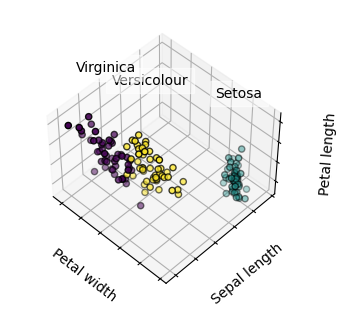

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten digits with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

For this exercise we use the `minist` dataset.

### MNIST Dataset


MNIST set is a large collection of **handwritten digits.** It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms. In simple terms, MNIST can be thought of as the “Hello, World!” of machine learning. MNIST is primarily used to experiment with different machine learning algorithms and to compare their relative strengths.

MNIST contains a collection of **70,000, 28 x 28** images of handwritten digits from **0 to 9.**

The dataset is already divided into training and testing sets. We will see this later in the tutorial.

For more information on MNIST, refer to its [Wikipedia page](https://en.wikipedia.org/wiki/MNIST_database). We are going to import the dataset .

Download and extract the MINIST dataset from the official website: http://yann.lecun.com/exdb/mnist/

![image-20221010151926993](images/image-20221010151926993.png)

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. 
Four files are available:

- train-images-idx3-ubyte.gz: training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
- t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
- t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

#### MNIST Dataset File Formats

The data is stored in a very simple file format designed for storing vectors and multidimensional matrices. General info on this format is given at the end of this page, but you don't need to read that to use the data files.

All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files:

```
train-images-idx3-ubyte: training set images
train-labels-idx1-ubyte: training set labels 
t10k-images-idx3-ubyte: test set images 
t10k-labels-idx1-ubyte: test set labels
```

The training set contains 60000 examples, and the test set 10000 examples.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.

- TRAINING SET LABEL FILE (train-labels-idx1-ubyte):

```
[offset] [type]     [value]     [description] 
0000   32 bit integer 0x00000801(2049) magic number (MSB first) 
0004   32 bit integer 60000      number of items 
0008   unsigned byte  ??        label 
0009   unsigned byte  ??        label 
........
xxxx   unsigned byte  ??        label
The labels values are 0 to 9.
```

- TRAINING SET IMAGE FILE (train-images-idx3-ubyte):

```
[offset] [type]     [value]     [description] 
0000   32 bit integer 0x00000803(2051) magic number 
0004   32 bit integer 60000      number of images 
0008   32 bit integer 28        number of rows 
0012   32 bit integer 28        number of columns 
0016   unsigned byte  ??        pixel 
0017   unsigned byte  ??        pixel 
........ 
xxxx   unsigned byte  ??        pixel
```

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

- TEST SET LABEL FILE (t10k-labels-idx1-ubyte):

```
[offset] [type]     [value]     [description]
0000   32 bit integer 0x00000801(2049) magic number (MSB first)
0004   32 bit integer 10000      number of items 
0008   unsigned byte  ??        label 
0009   unsigned byte  ??        label 
........ 
xxxx   unsigned byte  ??        label
```

The labels values are 0 to 9.

- TEST SET IMAGE FILE (t10k-images-idx3-ubyte):

```
[offset] [type]     [value]     [description] 
0000   32 bit integer 0x00000803(2051) magic number 
0004   32 bit integer 10000      number of images 
0008   32 bit integer 28        number of rows 
0012   32 bit integer 28        number of columns 
0016   unsigned byte  ??        pixel 
0017   unsigned byte  ??        pixel 
........
xxxx   unsigned byte  ??        pixel
```

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).   


## THE IDX FILE FORMAT

the IDX file format is a simple format for vectors and multidimensional matrices of various numerical types.

The basic format is

```
magic number
size in dimension 0
size in dimension 1
size in dimension 2 
.....
size in dimension N 
data
```

The magic number is an integer (MSB first). The first 2 bytes are always 0.

The third byte codes the type of the data: 
0x08: unsigned byte 
0x09: signed byte 
0x0B: short (2 bytes) 
0x0C: int (4 bytes) 
0x0D: float (4 bytes) 
0x0E: double (8 bytes)

The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices....

The sizes in each dimension are 4-byte integers (MSB first, high endian, like in most non-Intel processors).

The data is stored like in a C array, i.e. the index in the last dimension changes the fastest. 

Exercise 3: Qustions
- 1.What are the advantages and disadvantages of LDA?
- 2.LDA can be used for dimensionality reduction, so can PCA. What are the specific similarities and differences between the two??
